In [1]:
# Imports

import os
import pandas as pd
import numpy as np
from PIL import Image

In [7]:
dr_data_without_labels_path = '/sddata/data/retina_datasets/diabetic_retinopathy_detection/data_without_labels'

def find_images(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(root, file))
    return image_paths

directory = "/path/to/directory"
image_paths = find_images(dr_data_without_labels_path)
image_paths[:5]

dataset = ['train' for _ in range(len(image_paths))]
df_dict = {'image':image_paths, 'label':dataset}
df = pd.DataFrame(df_dict)
df.to_csv('/sddata/projects/SSL/custom_mae/csvs/non_labeled_dr_images.csv')

# Combining images

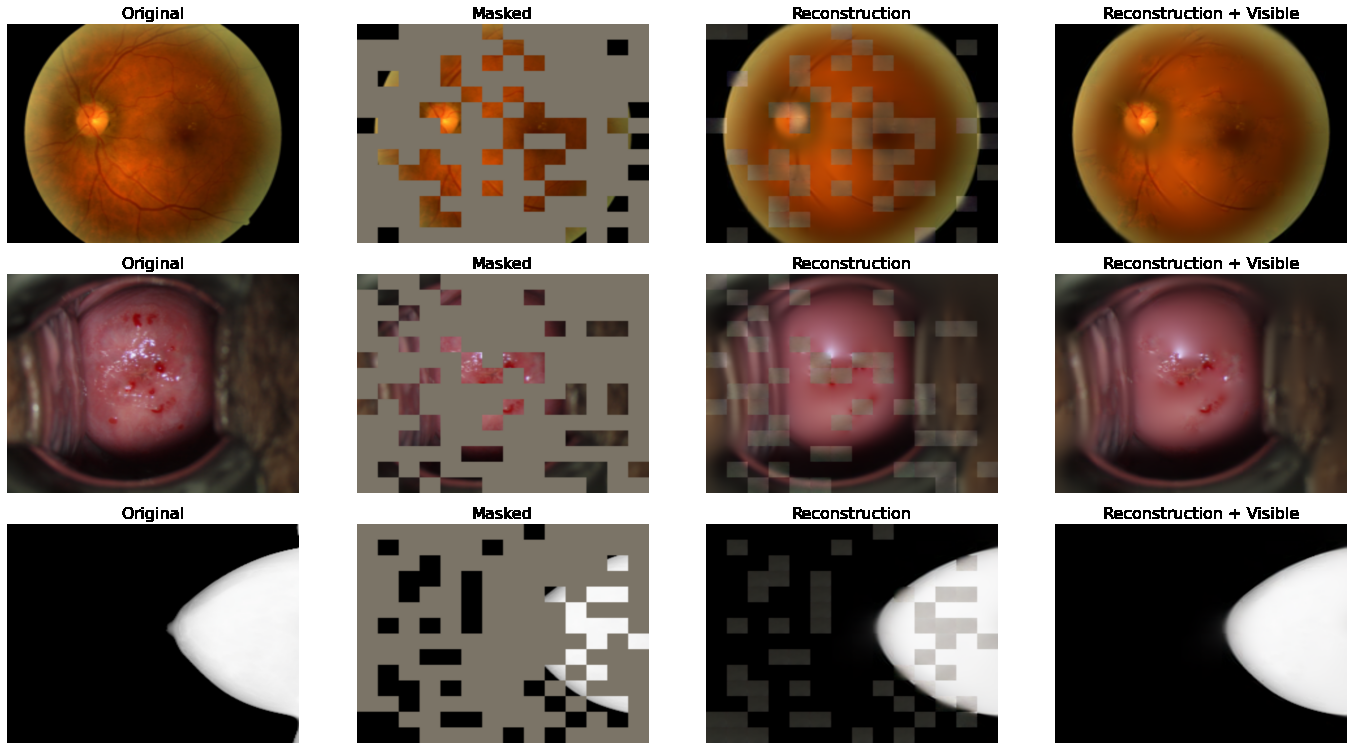

In [2]:
image_paths = ['/sddata/projects/Diabetic_Retinopathy_Cervix_SSL_vs_SL/presentation/DR_MAE.png', \
    '/sddata/projects/Diabetic_Retinopathy_Cervix_SSL_vs_SL/presentation/Cervix_MAE.png', \
    '/sddata/projects/Diabetic_Retinopathy_Cervix_SSL_vs_SL/presentation/DMIST_MAE.png']

def stack_images(image_paths):
    # Open images
    images = [Image.open(path) for path in image_paths]
    
    # Get dimensions of the first image
    width, height = images[0].size
    
    # Create a new image with double the height to stack images vertically
    stacked_image = Image.new('RGB', (width, height * len(images)))
    
    # Paste each image onto the stacked image
    for i, img in enumerate(images):
        stacked_image.paste(img, (0, i * height))
    
    return stacked_image

stacked_image = stack_images(image_paths)
stacked_image.show()  # Display the stacked image

# Looking at ViTFeatureExtractor

In [2]:
from transformers import ViTFeatureExtractor, ViTMAEForPreTraining, ViTForImageClassification

feature_extractor = ViTFeatureExtractor.from_pretrained('facebook/vit-mae-base')
feature_extractor

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
example_npy = np.load('/sddata/data/dmist/dmist_preprocessed_npys/preprocessed_tensorflow2/_mnt_jk489_acr_dmist_DMIST-SHA_2019_2_19_1_963D26BC_E06EBFFD_2AA05CFC_3279_4.npy')
print(np.max(example_npy), np.min(example_npy), example_npy.shape)
example_npy_uint8 = np.uint8(255*example_npy)
print(np.max(example_npy_uint8), np.min(example_npy_uint8), example_npy_uint8.shape)
example_npy_to_pil_image = Image.fromarray(example_npy_uint8, 'RGB')

0.9571598703244086 0.0 (224, 224, 3)
244 0 (224, 224, 3)


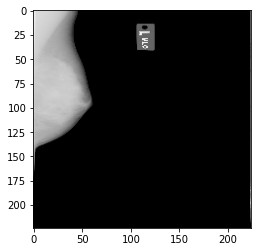

In [10]:
plt.imshow(example_npy)

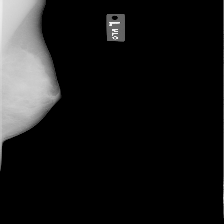

In [16]:
example_npy_to_pil_image